# Una mirada al concepto de Regresión lineal

<img src=https://fide.dev/wp-content/uploads/2019/10/cover.png width="600" height="400">


###  Tabla de contenido

* [1. Introducción](#Introducción)
* [2. Antecedentes históricos](#Antecedentes)
* [3. Presentación del algoritmo](#Algoritmo)
* [4. Ejercicio de aplicación](#Ejercicio)
* [5. Conclusiones](#Conclusiones)
* [Referencias](#Referencias)

# Introducción

En el análisis y modelamiento de datos es importante el uso de diferentes herramientas matemáticas, esto con el fin de describir el comportamiento de los mismos. Con esto en mente, uno de los métodos más populares en medio de la estadística y de la ciencia de datos es la [*regresión lineal*](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal). La idea central de este algoritmo es relacionar un conjunto de [variables respuestas o dependientes](https://en.wikipedia.org/wiki/Dependent_and_independent_variables) con un conjunto de [variables explicativas o independientes](https://en.wikipedia.org/wiki/Dependent_and_independent_variables), ambas de carácter cuantitativo, ya sea para hacer sociación, control de calidad, calibración, clasificación y predicción; por medio de una relación lineal entre las variables respuesta y los parámetros de interés. En caso que no sean cuantitativas se usan otros modelos como la regresión logística (Hocking,2003)

En lo que respecta al aprendizaje de máquina, la regresión lineal es de vital relevancia para clasificar y predicir. Para ello, se recurren a diferentes estrategias de optimización para estimar los parámetros como lo son [mínimos cuadrados](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados) o el método de [Gradiente Descendiente](https://www.iartificial.net/gradiente-descendiente-para-aprendizaje-automatico/); además de múltiples formas de validación (Bowles, 2015) (Müller, A. C., & Guido, S, 2016). Sin embargo, podemos tener datos que están relacionados de diferentes formas y debemos ser cuidadosos a la hora de plantear nuestros modelos; pues podemos implementar el modelo y tener malos ajustes. 

<img src="https://1.bp.blogspot.com/-FEY9ztYPRlY/WRXjotS5MzI/AAAAAAAAh0Y/WwqoEwIN5cMfswTSQBsLa2Y0VzQrLU_wQCLcB/s1600/dispersion.png" width="600" height="400">

Con lo anterior en mente, este cuaderno tiene como objetivo presentar el formalismo matemático de la regresión lineal junto con un ejemplo de aplicación, en el cual se encuentra la relación entre la potencia eléctrica de climatización y temperatura exterior de una planta. Este ejemplo y los datos usados se pueden encontrar en el blog de machine learning [Koldopina](https://koldopina.com/regresion-lineal-simple/).

# Antecedentes históricos <a id="Antecedentes"></a> 

Los primeros desarrollos teóricas sobre regresión lineal se remontan a comienzos del siglo XIX cuando [Legendre](https://es.wikipedia.org/wiki/Adrien-Marie_Legendre), en 1805, y [Gauss](https://es.wikipedia.org/wiki/Carl_Friedrich_Gauss), en 1809,  implementaron este algoritmo para solucionar el movimientos de los planetas. En el planteamiento original se planteaba una relación lineal entre las variables explicativas y los parámetros de interés, es decir $y = \beta_1 x + \beta_0$, donde $y$ es la variable respuesta, $x$ es la variable explicativa y, $\beta_1$ y  $\beta_0$ los parámetros a determinar. A partir de esto, determinaron los parámetros usando mínimos cuadrados (Stigler, S. M. 1986).
<img src="https://year2020.bigbadmole.com/wp-content/uploads/2019/02/retrogradnye-planety-v-2020-godu-2.jpg" width="600" height="400" >

*El estudio del movimiento planetario contribuyó al desarrollo de la regresión lineal y a la posterior implementación de los modelos lineales*

# Presentación del algoritmo <a id="Algoritmo"></a>

[Explicación](https://www.youtube.com/watch?v=SsFBnvkoZa4&ab_channel=EstimadosEstadisticos)



Si bien es cierto que hay cursos universitarios completos de regresión lineal, lo que vamos a abordar constituye las bases para modelos más elaborados. Si el lector se quiere familiarizar más con ello, puede ver los [usos de la regresión en el aprendizaje profundo](https://www.youtube.com/watch?v=E5RjzSK0fvY&ab_channel=edureka%21) y también [lecciones sobre el formalismo matemático mas detallado](https://www.youtube.com/watch?v=4b4MUYve_U8&ab_channel=stanfordonline)

# Ejercicio de aplicación <a id="Ejercicio"></a>

Este ejercicio de aplicación es presentado por Koldo en su blog de Machine Learning [Koldopina](https://koldopina.com/regresion-lineal-simple/), consiste ... 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import csv

In [14]:
with open('data.csv', 'r') as f:
    reader = csv.reader(f, delimiter='|')
    OUTDOOR_TEMP = []
    ELECTRIC_POWER = []
    for index, row in enumerate(reader):
        if index == 0:
            header = row
        else:
            try:
                outNum = float(row[0].replace(",", "."))
            except:
                outNum = None
            OUTDOOR_TEMP.append(outNum)
            try:
                elecNum = float(row[1].replace(",", "."))
            except:
                elecNum = None
            ELECTRIC_POWER.append(elecNum)

In [15]:
def info(header, data_list):
    """
    :param header: lista con los encabezados de las columnas
    :param data_list: lista con las listas de datos de las columnas: [lista1, lista2, etc...]
    :return: diccionario de diccionarios con número de registros, tipo de dato, número de na,
              media, std, min, max de cada columna.
    """

    from collections import defaultdict

    header = header
    columns = data_list
    values = defaultdict()
    for index, head in enumerate(header):
        aux = defaultdict()
        aux['len'] = len(columns[index])
        aux['clases'] = set([type(ele) for ele in columns[index]])
        aux['na'] = sum(1 for ele in columns[index] if ele == None)
        # media
        media = sum(ele for ele in columns[index] if ele != None) / len(columns[index])
        aux['media'] = media
        # std
        n = sum(1 for ele in columns[index] if ele != None)
        std = ((1 / (n - 1)) * sum((ele - media) ** 2 for ele in columns[index] if ele != None)) ** 0.5
        aux['std'] = std
        # minimo
        aux['min'] = min(ele for ele in columns[index] if ele != None)
        # maximo
        aux['max'] = max(ele for ele in columns[index] if ele != None)
        values[head] = aux
    return values

In [20]:
print('_'*60 + 'COLUMNS')
print (header)


____________________________________________________________COLUMNS
['OUTDOOR_TEMP', 'ELECTRIC_POWER']


In [26]:
print ('_'*60 + 'INFO') 
print (info(header, [OUTDOOR_TEMP, ELECTRIC_POWER]))

____________________________________________________________INFO
defaultdict(None, {'OUTDOOR_TEMP': defaultdict(None, {'len': 1496, 'clases': {<class 'float'>}, 'na': 0, 'media': 28.544429085561454, 'std': 6.364374947698145, 'min': 0.0, 'max': 38.310135}), 'ELECTRIC_POWER': defaultdict(None, {'len': 1496, 'clases': {<class 'float'>, <class 'NoneType'>}, 'na': 2, 'media': 285.83182486631, 'std': 41.51823016424719, 'min': 0.0, 'max': 391.71})})


In [28]:
#Quitamos los nas
index_to_drop = [index for index, val in enumerate(ELECTRIC_POWER) if val is None]
ELECTRIC_POWER = [val for index, val in enumerate(ELECTRIC_POWER) if index not in index_to_drop]
OUTDOOR_TEMP = [val for index, val in enumerate(OUTDOOR_TEMP) if index not in index_to_drop]

In [29]:
print (info(header, [OUTDOOR_TEMP, ELECTRIC_POWER]))

defaultdict(None, {'OUTDOOR_TEMP': defaultdict(None, {'len': 1494, 'clases': {<class 'float'>}, 'na': 0, 'media': 28.54050408902272, 'std': 6.36757237847448, 'min': 0.0, 'max': 38.310135}), 'ELECTRIC_POWER': defaultdict(None, {'len': 1494, 'clases': {<class 'float'>}, 'na': 0, 'media': 286.21446452476556, 'std': 41.51646570695531, 'min': 0.0, 'max': 391.71})})


In [31]:
def visual(header, X, y):
    """
    :param header: Lista con los nombres de los encabezados
    :param X: Lista con los valores de la columna a colocar en el eje X
    :param y: Lista con los valores de la columna a colocar en el eje y
    :return: matplotlib figure plot
    """

    fs = 10  # fontsize
    fig, axs = plt.subplots(3, 2, figsize=(6, 6))
    plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.5, wspace=0.2, left=0.125, right=0.9)
    axs[0, 0].scatter(X, y, c='r', edgecolors=(0, 0, 0), alpha=0.2)
    axs[0, 0].set_title('Scatter %s vs %s' %(header[1], header[0]), fontsize=fs)
    axs[1, 0].hist(X, color='red')
    axs[1, 0].set_title('Hist %s' %header[0], fontsize=fs)
    axs[0, 1].hist2d(X, y)
    axs[0, 1].set_title('Hist 2D', fontsize=fs)
    axs[1, 1].hist(y, color='blue')
    axs[1, 1].set_title('Hist %s' %header[1], fontsize=fs)
    axs[2, 0].boxplot(X)
    axs[2, 0].set_title('Box %s' %header[0], fontsize=fs)
    axs[2, 1].boxplot(y)
    axs[2, 1].set_title('Box %s' %header[1], fontsize=fs)
    plt.show()

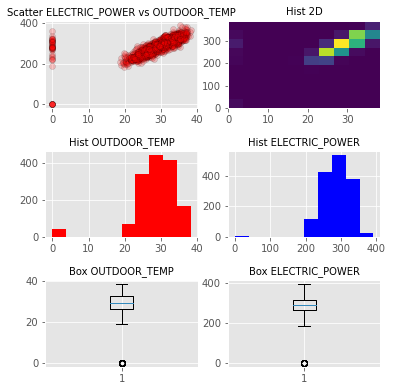

In [32]:
#Ploteamos la gráfica
visual(header, OUTDOOR_TEMP, ELECTRIC_POWER)

In [33]:
#Quitamos los outlier o valores atípicos
index_to_drop = [index for index, val in enumerate(OUTDOOR_TEMP) if val == 0]
ELECTRIC_POWER = [val for index, val in enumerate(ELECTRIC_POWER) if index not in index_to_drop]
OUTDOOR_TEMP = [val for index, val in enumerate(OUTDOOR_TEMP) if index not in index_to_drop]

In [35]:
print (info(header, [OUTDOOR_TEMP, ELECTRIC_POWER]))

defaultdict(None, {'OUTDOOR_TEMP': defaultdict(None, {'len': 1449, 'clases': {<class 'float'>}, 'na': 0, 'media': 29.42685514768802, 'std': 3.963016838173277, 'min': 18.765305, 'max': 38.310135}), 'ELECTRIC_POWER': defaultdict(None, {'len': 1449, 'clases': {<class 'float'>}, 'na': 0, 'media': 287.81427881297435, 'std': 35.88844333632387, 'min': 183.12, 'max': 391.71})})


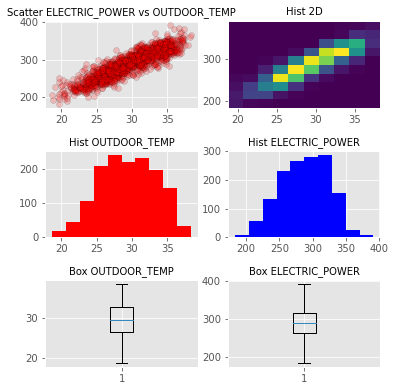

In [36]:
visual(header, OUTDOOR_TEMP, ELECTRIC_POWER)

In [38]:
#creamos las listas para training y test aleatoriamente
all_data = [[x_val, y_val] for x_val, y_val in zip(OUTDOOR_TEMP, ELECTRIC_POWER)]
print (all_data[:5])
random.shuffle(all_data)
div = math.ceil(len(all_data)*0.3)
data_train = all_data[:div]
data_test = all_data[div:]

data_train_X = [ele[0] for ele in data_train]
data_train_y = [ele[1] for ele in data_train]
data_test_X = [ele[0] for ele in data_test]
data_test_y = [ele[1] for ele in data_test]

[[31.321108, 324.54], [24.938467, 252.7], [33.316906, 331.1], [26.947517, 270.8], [34.769539, 288.66]]


In [39]:
class Lin_reg():

    def __init__(self, X, Y):
        """
        :param X: lista con los valores de la variable de las abscisas
        :param y: lista con los valores de la variable de las ordenadas
        """
        self.X = X
        self.y = Y
        self.N = len(self.X)
        self.X_mean = sum(self.X) / len(self.X)
        self.y_mean = sum(self.y) / len(self.y)
        self.X_std = (1 / (self.N - 1) * sum((ele - self.X_mean) ** 2
                                             for ele in self.X)) ** 0.5
        self.y_std = (1 / (self.N - 1) * sum((ele - self.y_mean) ** 2
                                             for ele in self.y)) ** 0.5
        self.X_var = self.X_std ** 2
        self.y_var = self.y_std ** 2
        self.cov = sum([i * j for (i, j) in zip([ele - self.X_mean for ele in self.X],
                                                [ele - self.y_mean for ele in self.y])]) / (self.N)

        self.r = self.cov / (self.X_std * self.y_std)

    def Coeficientes(self):
        if len(self.X) != len(self.y):
            raise ValueError('unequal length')
        self.b = self.cov / self.X_var
        self.a = self.y_mean - (self.b * self.X_mean)
        return self.a, self.b

    def predict(self, X):
        yp = []
        for x in X:
            yp.append(self.a + self.b * x)
        return yp

In [40]:
mylinreg=Lin_reg(data_train_X,data_train_y)

In [41]:
a, b = mylinreg.Coeficientes()
print('La recta de regresión es: y = %f + %f * X'%(mylinreg.Coeficientes()))
print('El coeficiente de correlación es: r = %f' %mylinreg.r)

La recta de regresión es: y = 52.718339 + 7.967852 * X
El coeficiente de correlación es: r = 0.894784


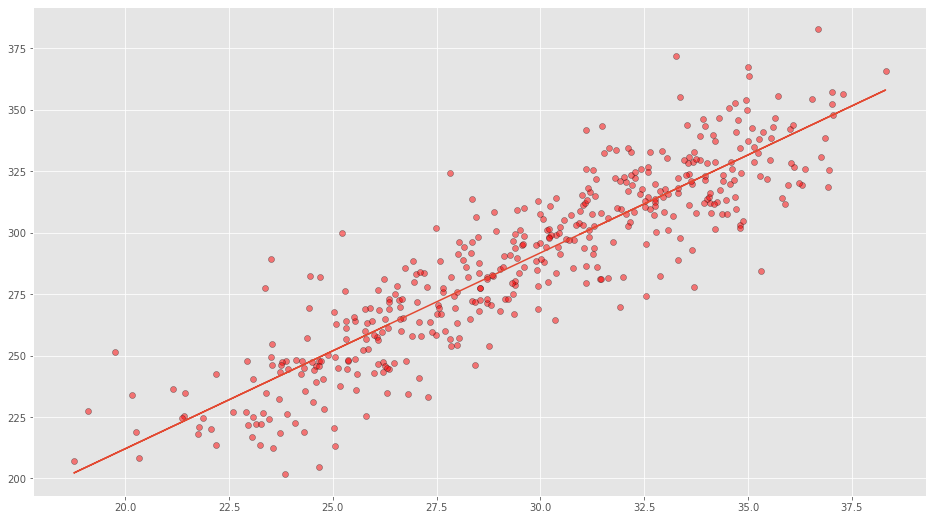

In [42]:
plt.scatter(data_train_X, data_train_y, c='r', edgecolors=(0, 0, 0), alpha=0.5)
plt.plot(data_train_X, [a + b * x for x in data_train_X])
plt.show()

In [43]:
predictions = mylinreg.predict(data_test_X)

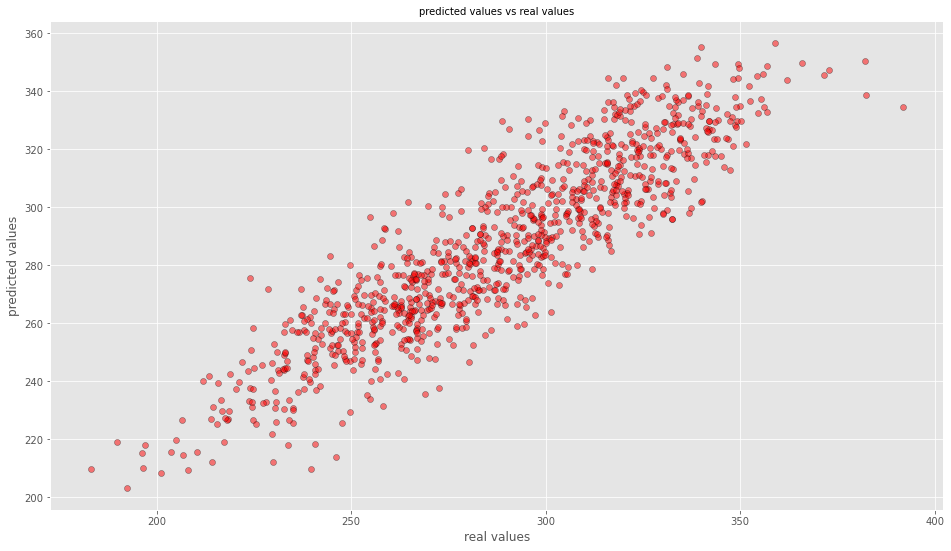

In [44]:
plt.scatter(data_test_y, predictions, c='r', edgecolors=(0, 0, 0), alpha=0.5)
plt.title('predicted values vs real values', fontsize=10)
plt.xlabel('real values')
plt.ylabel('predicted values')
plt.show()

In [46]:
#Metricas
#Mean Error - Desviación media
ME = sum(y_pred - y_test for y_pred, y_test in zip(predictions,data_test_y)) / len(predictions)
#Mean Absolute Error (error absoluto medio)
MAE = sum(abs(y_pred - y_test) for y_pred, y_test in zip(predictions,data_test_y)) / len(predictions)
#Mean Square Error (error cuadrático medio)
MSE = sum((y_pred - y_test)**2 for y_pred, y_test in zip(predictions, data_test_y)) / len(predictions)
#Root Mean Square Error - error de la raíz cuadrada de la media RMSE
RMSE = MSE ** 0.5
#Standard Deviation of Residuals . Desviación típica de los residuos
SDR = (1 / (len(data_test_y) - 1) * sum((y_test - y_pred) ** 2
        for y_pred, y_test in zip(predictions, data_test_y))) ** 0.5

print ('Mean Error: %f' %ME)
print ('Mean Absolute Error: %f' %MAE)
print ('Mean Square Error: %f' %MSE)
print ('Root Mean Square Error: %f' %RMSE)
print ('Standard Desviation of Residuals: %f' %SDR)

Mean Error: -0.896127
Mean Absolute Error: 12.587058
Mean Square Error: 244.335936
Root Mean Square Error: 15.631249
Standard Desviation of Residuals: 15.638962


In [51]:
data_test_mean = sum(ele
    for ele in data_test_y) / len(data_test_y)
predictions_mean = sum(ele
    for ele in predictions) / len(predictions)

data_test_std = (1 / (len(data_test_y) - 1) * sum((ele - data_test_mean) ** 2
    for ele in data_test_y)) ** 0.5
predictions_std = (1 / (len(predictions) - 1) * sum((ele - predictions_mean) ** 2
    for ele in predictions)) ** 0.5
cov = sum([i * j
    for (i, j) in zip([ele - data_test_mean
        for ele in data_test_y], 
                      [ele - predictions_mean
        for ele in predictions])
]) / (len(predictions))

print('El coeficiente de correlación es: R2 = %f' % (cov**2 / (data_test_std ** 2 * predictions_std ** 2)))

El coeficiente de correlación es: R2 = 0.806621


/home/david/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


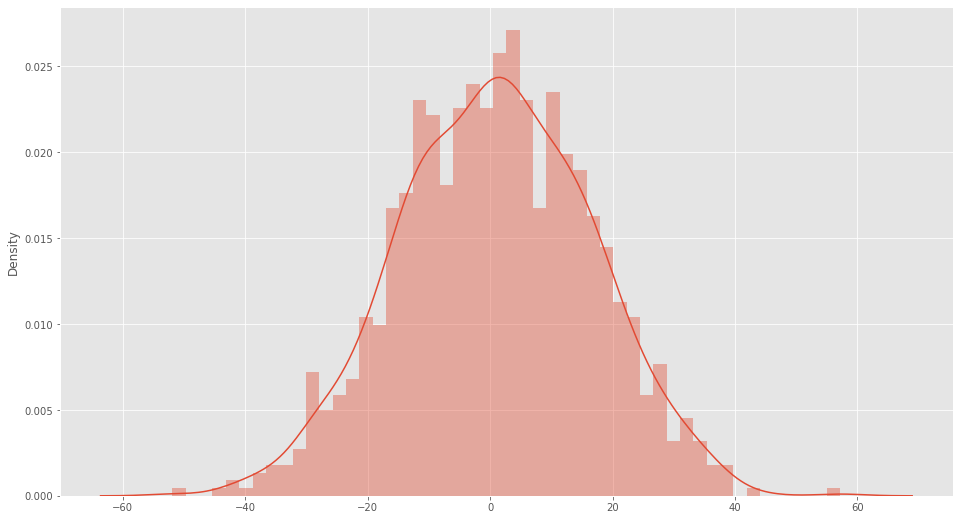

In [52]:
#Distribución de los Residuos
sns.distplot((np.asarray(data_test_y) - np.asarray(predictions)), bins = 50)
plt.show()

# Conclusiones 

# Referencias 

* Bowles, M. (2015). Machine learning in Python: essential techniques for predictive analysis. John Wiley & Sons.
* Hocking, R. R. (2003), Methods and Applications of Linear Models, segunda edn, John Wiley and Sons, New Jersey.
* Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: a guide for data scientists. " O'Reilly Media, Inc.".
* Ravishanker, N. & Dey, D. K. (2002), A First Course in Linear Model Theory, Chapman & Hall/CRC., New York.
* Stigler, S. M. (1986). The history of statistics: The measurement of uncertainty before 1900. Harvard University Press.
